In [1]:
import h5py
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import pandas as pd
from tqdm import tqdm
%matplotlib inline
sextractor = pd.read_parquet("/data1/public/BGS/sim_z/south/sextractor.parquet")
sextractor["flux_g"] = sextractor["flux_g"].astype(float)
sextractor["flux_r"] = sextractor["flux_r"].astype(float)
sextractor["flux_z"] = sextractor["flux_z"].astype(float)
b_t = np.load("/data/public/ChenM/MIFIT/desi/result/fixed_b_t.npy")
sextractor["b_t"] = b_t
b_d = np.load("/data/public/ChenM/MIFIT/desi/result/fixed_b_d.npy")
sextractor["b_d"] = b_d
sextractor.columns[:50],sextractor.columns[50:]


(Index(['ra', 'dec', 'NUMBER_g', 'X_IMAGE_g', 'Y_IMAGE_g', 'MAG_BEST_g',
        'MAGERR_BEST_g', 'FLUX_BEST_g', 'FLUXERR_BEST_g', 'MAG_AUTO_g',
        'MAGERR_AUTO_g', 'MAG_ISOCOR_g', 'MAGERR_ISOCOR_g', 'A_IMAGE_g',
        'ERRA_IMAGE_g', 'B_IMAGE_g', 'ERRB_IMAGE_g', 'THETA_IMAGE_g',
        'ERRTHETA_IMAGE_g', 'ELONGATION_g', 'FLUX_RADIUS_g', 'FLUX_PETRO_g',
        'FLUXERR_PETRO_g', 'PETRO_RADIUS_g', 'KRON_RADIUS_g', 'BACKGROUND_g',
        'ELLIPTICITY_g', 'FWHM_IMAGE_g', 'MAG_PETRO_g', 'MU_MAX_g',
        'MU_THRESHOLD_g', 'NUMBER_r', 'X_IMAGE_r', 'Y_IMAGE_r', 'MAG_BEST_r',
        'MAGERR_BEST_r', 'FLUX_BEST_r', 'FLUXERR_BEST_r', 'MAG_AUTO_r',
        'MAGERR_AUTO_r', 'MAG_ISOCOR_r', 'MAGERR_ISOCOR_r', 'A_IMAGE_r',
        'ERRA_IMAGE_r', 'B_IMAGE_r', 'ERRB_IMAGE_r', 'THETA_IMAGE_r',
        'ERRTHETA_IMAGE_r', 'ELONGATION_r', 'FLUX_RADIUS_r'],
       dtype='object'),
 Index(['FLUX_PETRO_r', 'FLUXERR_PETRO_r', 'PETRO_RADIUS_r', 'KRON_RADIUS_r',
        'BACKGROUND_r', 'ELLIPTI

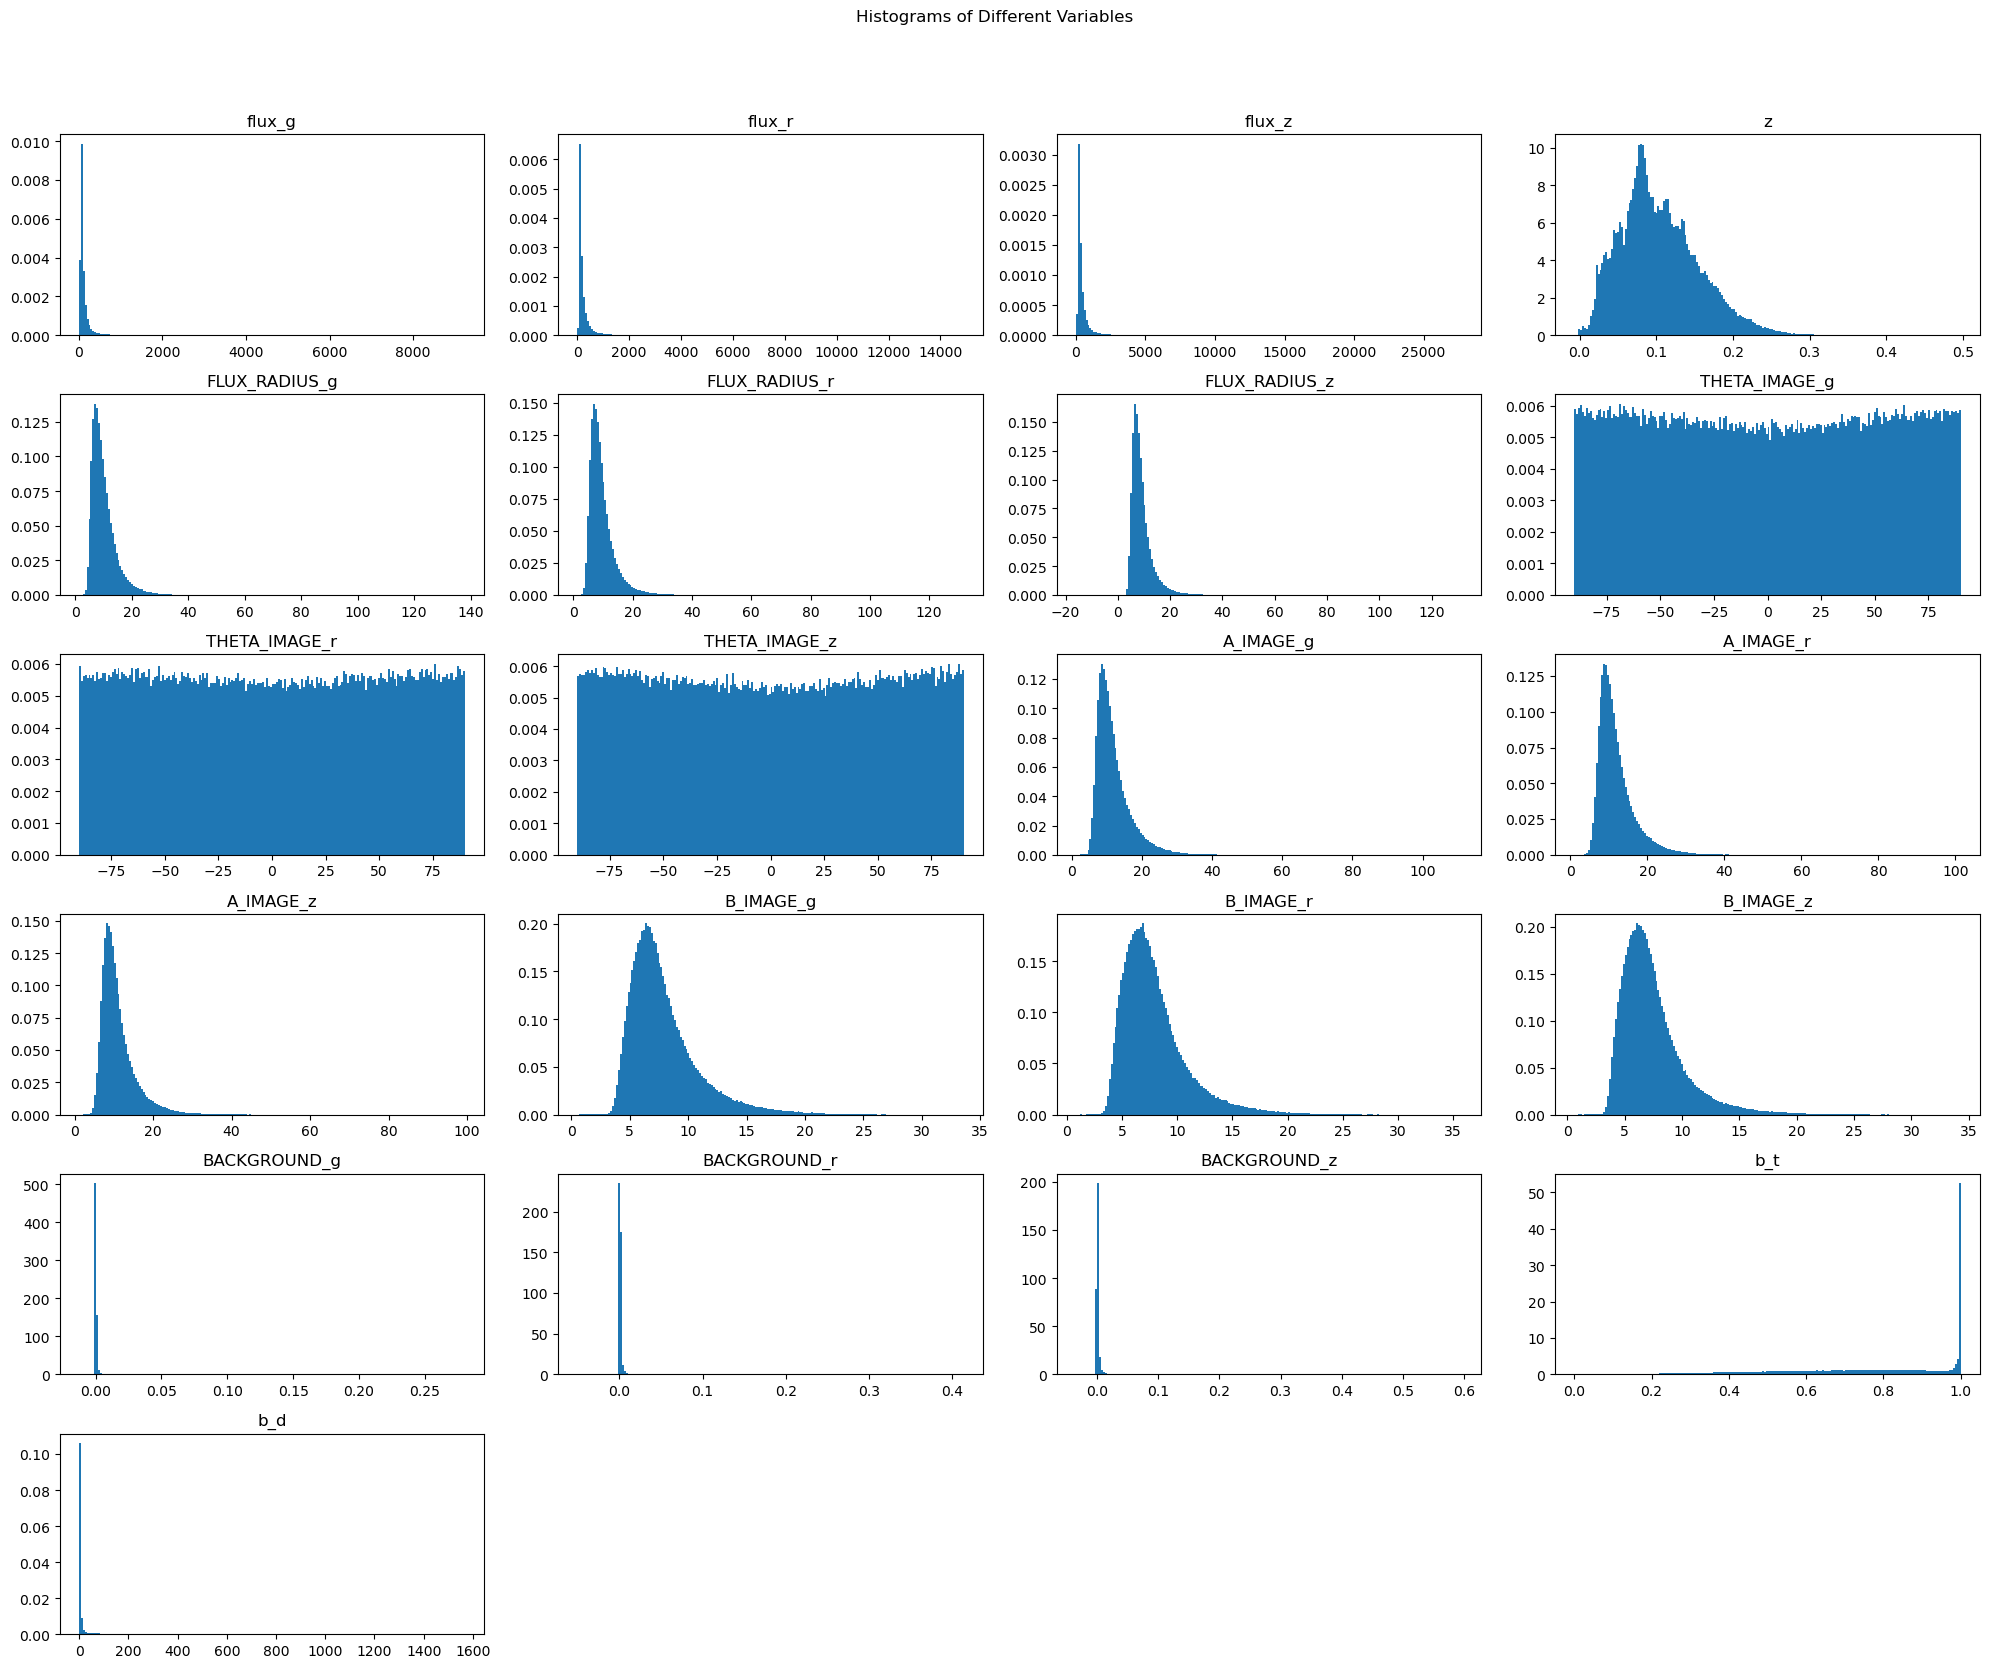

In [2]:
import matplotlib.pyplot as plt

# Assuming 'sextractor' is a dictionary or similar data structure containing the data
variables = [
    "flux_g", "flux_r", "flux_z",  # flux information
    "z",  # redshift information
    "FLUX_RADIUS_g", "FLUX_RADIUS_r", "FLUX_RADIUS_z",  # half-light radius flux
    "THETA_IMAGE_g", "THETA_IMAGE_r", "THETA_IMAGE_z",  # position angle
    "A_IMAGE_g", "A_IMAGE_r", "A_IMAGE_z",  # major axis
    "B_IMAGE_g", "B_IMAGE_r", "B_IMAGE_z",  # minor axis
    "BACKGROUND_g", "BACKGROUND_r", "BACKGROUND_z",  # background value
    "b_t", "b_d"
]

# Create a figure with multiple subplots
fig, axs = plt.subplots(7, 4, figsize=(20, 20))  # Adjust the grid size and figure size as necessary
fig.suptitle('Histograms of Different Variables')
axs = axs.flatten()
# Iterate through the variables and plot each histogram
for i, var in enumerate(variables):
    # if var.startswith('flux'):
    #     # Apply the given formula to the flux values
    #     transformed_values = 22.5 - 2.5 * np.log10(sextractor[var])
    #     axs[i].hist(transformed_values, bins=30)
    # else:
        # axs[i].hist(sextractor[var], bins=30)
    axs[i].hist(sextractor[var], bins=200, density=True)
    axs[i].set_title(var)

# Hide any unused subplots
for ax in axs[len(variables):]:
    ax.set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the main title
plt.show()

In [3]:
test = sextractor.copy() # 筛选之后的数据初始化

In [4]:
variables_with_ranges = {
    "flux_g": (0, 500),
    "flux_r": (0, 1000),
    "flux_z": (0, 2500),
    "z": (0, 0.3),
    "FLUX_RADIUS_g": (3, 25),
    "FLUX_RADIUS_r": (3, 25),
    "FLUX_RADIUS_z": (3, 25),
    "A_IMAGE_g": (2.5,30),
    "A_IMAGE_r": (2.5,30),
    "A_IMAGE_z": (2.5,30),
    "B_IMAGE_g": (2.5,20),
    "B_IMAGE_r": (2.5,20),
    "B_IMAGE_z": (2.5,20),
    "BACKGROUND_g": (-0.0005,0.003),
    "BACKGROUND_r": (-0.001,0.005),
    "BACKGROUND_z": (-0.001,0.01),
    "b_t": (0,1),
    "b_d": (0,40),
}

# # 遍历字典中的每个变量及其范围
# for variable, (min_value, max_value) in variables_with_ranges.items():
#     # 保留在给定范围内的行
#     test = test[(test[variable] >= min_value) & (test[variable] <= max_value)]

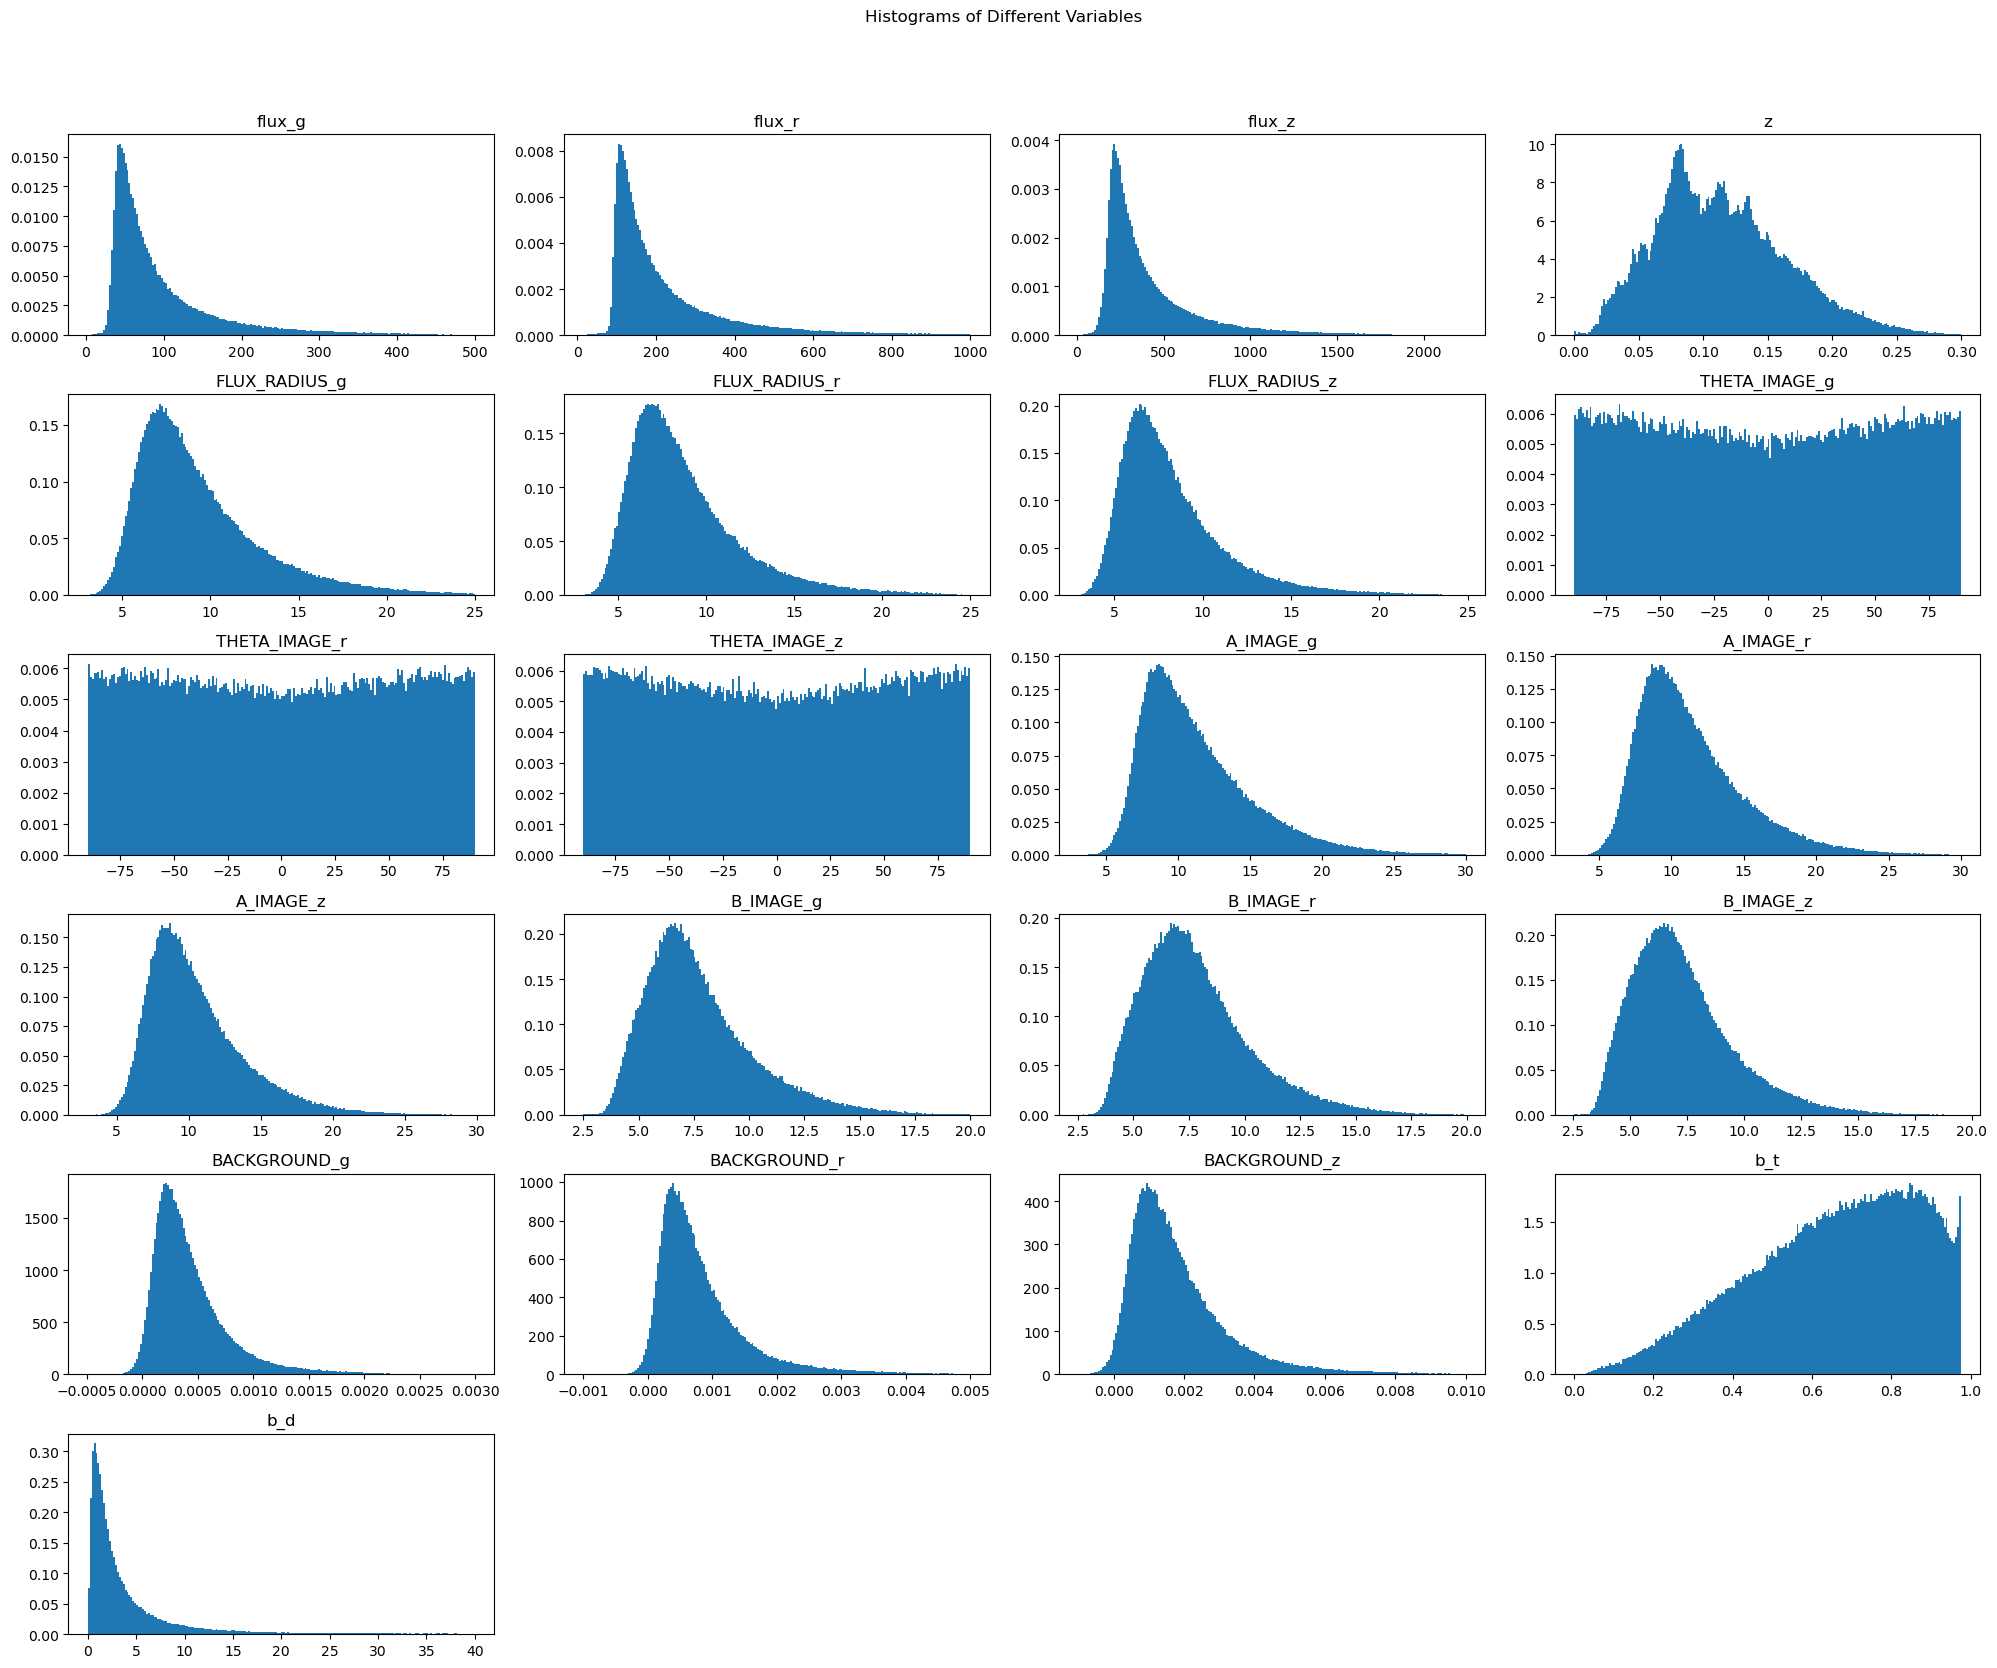

In [7]:
fig, axs = plt.subplots(7, 4, figsize=(20, 20))  # Adjust the grid size and figure size as necessary
fig.suptitle('Histograms of Different Variables')
axs = axs.flatten()
for i, var in enumerate(variables):
    # if var.startswith('flux'):
    #     # Apply the given formula to the flux values
    #     transformed_values = 22.5 - 2.5 * np.log10(sextractor[var])
    #     axs[i].hist(transformed_values, bins=30)
    # else:
    #     axs[i].hist(test[var], bins=30)
    axs[i].hist(test[var], bins=200, density=True)
    axs[i].set_title(var)

# Hide any unused subplots
for ax in axs[len(variables):]:
    ax.set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the main title
plt.show()

In [64]:
# with open("/data1/public/BGS/simulation/model_img_urls.txt", "w") as w:
#     # for i in range(len(sextractor)):
#     for i in range(200):
#         ra, dec = sextractor.loc[i,"ra"], sextractor.loc[i,"dec"]
#         w.writelines(f"'https://www.legacysurvey.org/viewer/fits-cutout/?ra={ra}&dec={dec}&layer=ls-dr9-south-model&pixscale=0.262&bands=grz&size=128' /data1/public/BGS/simulation/model_img/{ra}_{dec}.fits\n")

In [ ]:
variables = [
    "flux_g", "flux_r", "flux_z",  # flux information
    "z",  # redshift information
    "FLUX_RADIUS_g", "FLUX_RADIUS_r", "FLUX_RADIUS_z",  # half-light radius flux
    "THETA_IMAGE_g", "THETA_IMAGE_r", "THETA_IMAGE_z",  # position angle
    "A_IMAGE_g", "A_IMAGE_r", "A_IMAGE_z",  # major axis
    "B_IMAGE_g", "B_IMAGE_r", "B_IMAGE_z",  # minor axis
    "BACKGROUND_g", "BACKGROUND_r", "BACKGROUND_z",  # background value
    "b_t", "b_d"
]

In [32]:
test = test.reset_index(drop=True)

In [17]:
scale_range = {
    "flux_g": (0, 500),
    "flux_r": (0, 1000),
    "flux_z": (0, 2500),
    "z": (0, 0.3),
    "FLUX_RADIUS_g": (3, 25),
    "FLUX_RADIUS_r": (3, 25),
    "FLUX_RADIUS_z": (3, 25),
    "THETA_IMAGE_g": (-90, 90),
    "THETA_IMAGE_r": (-90, 90),
    "THETA_IMAGE_z": (-90, 90),
    "A_IMAGE_g": (2.5,30),
    "A_IMAGE_r": (2.5,30),
    "A_IMAGE_z": (2.5,30),
    "B_IMAGE_g": (2.5,20),
    "B_IMAGE_r": (2.5,20),
    "B_IMAGE_z": (2.5,20),
    "BACKGROUND_g": (-0.0005,0.003),
    "BACKGROUND_r": (-0.001,0.005),
    "BACKGROUND_z": (-0.001,0.01),
    "b_t": (0,1),
    "b_d": (0,40),
}

In [24]:
def scale_data(value, min_val, max_val):
    return (value - min_val) / (max_val - min_val)
file = h5py.File("/data/public/renhaoye/stylegan3/DESI_GAN_2.h5", 'r')
labels = file["labels"]
normalized_labels = np.zeros_like(labels, dtype=np.float32)
for i, (key, (min_val, max_val)) in enumerate(scale_range.items()):
    if "BACKGROUND" not in key:
        normalized_labels[:, i] = scale_data(labels[:, i], min_val, max_val)
    else:
        normalized_labels[:, i] = labels[:, i]

In [25]:
print(labels[0])

[ 4.23739360e+01  1.22349320e+02  2.42619050e+02  1.57441556e-01
  6.32700000e+00  6.93900000e+00  6.22100000e+00 -6.12800000e+01
 -5.91600000e+01 -6.01800000e+01  8.63300000e+00  1.00850000e+01
  9.37500000e+00  6.04100000e+00  6.66700000e+00  6.21800000e+00
  9.58378500e-04  2.30103900e-03  5.71457500e-03  8.01205873e-01
  4.03032970e+00]


In [28]:
np.delete(normalized_labels, [16, 17, 18], axis=1).shape

(237813, 18)

In [41]:

def write_to_h5(h5_file, dataset_name, data, start_idx):
    with h5py.File(h5_file, 'a') as f:
        if dataset_name not in f:
            f.create_dataset(dataset_name, data=data, maxshape=(None,)+data.shape[1:], chunks=True)
        else:
            f[dataset_name].resize((f[dataset_name].shape[0] + data.shape[0]), axis=0)
            f[dataset_name][-data.shape[0]:] = data

batch_size = 10000
for start_idx in range(0, len(test), batch_size):
    end_idx = min(start_idx + batch_size, len(test))
    images, psfs, labels = [], [], []
    
    for i in tqdm(range(start_idx, end_idx)):
        with fits.open(test.loc[i, 'Image Path']) as hdul:
            image_data = hdul[0].data
            images.append(image_data)
        with fits.open(test.loc[i, 'psf']) as hdul:
            g = hdul[0].data
            r = hdul[1].data
            z = hdul[2].data
            psfs.append(np.array([g, r, z]))
        row_labels = [test.loc[i, var] for var in variables]
        labels.append(row_labels)
    
    images_np = np.array(images)
    psfs_np = np.array(psfs)
    labels_np = np.array(labels)
    
    # 调用write_to_h5函数写入数据
    write_to_h5('/data/public/renhaoye/stylegan3/DESI_GAN_2.h5', 'images', images_np, start_idx)
    write_to_h5('/data/public/renhaoye/stylegan3/DESI_GAN_2.h5', 'psfs', psfs_np, start_idx)
    write_to_h5('/data/public/renhaoye/stylegan3/DESI_GAN_2.h5', 'labels', labels_np, start_idx)

100%|██████████| 7813/7813 [03:30<00:00, 37.12it/s]


In [ ]:
# def write_to_h5(h5_file, dataset_name, data, start_idx):
#     with h5py.File("/data/public/renhaoye/stylegan3/"+h5_file, 'a') as f:
#         if dataset_name not in f:
#             f.create_dataset(dataset_name, data=data, maxshape=(None,)+data.shape[1:], chunks=True)
#         else:
#             f[dataset_name].resize((f[dataset_name].shape[0] + data.shape[0]), axis=0)
#             f[dataset_name][-data.shape[0]:] = data
# batch_size = 10000
# images, psfs, labels = [], [], []
# # for i in tqdm(range(50)):
# for i in tqdm(range(len(test))):
#     with fits.open(test.loc[i, 'Image Path']) as hdul:
#         image_data = hdul[0].data
#         images.append(image_data)
#     with fits.open(test.loc[i, 'psf']) as hdul:
#         g = hdul[0].data
#         r = hdul[1].data
#         z = hdul[2].data
#         psfs.append(np.array([g, r, z]))
#     row_labels = [test.loc[i, var] for var in variables]
#     labels.append(row_labels)
# images_np = np.array(images)
# psfs_np = np.array(psfs)
# labels_np = np.array(labels)
# # write_to_h5('DESI_GAN_2.h5', 'images', images_np, index - batch_size + 1)
# # write_to_h5('DESI_GAN_2.h5', 'psfs', psfs_np, index - batch_size + 1)
# # write_to_h5('DESI_GAN_2.h5', 'labels', labels_np, index - batch_size + 1)

In [ ]:
# with h5py.File("/data/public/renhaoye/stylegan3/DESI_GAN_2.h5", 'a') as f:
#     f.create_dataset("images", data=images_np, maxshape=(None,)+images_np.shape[1:], chunks=True)
#     f.create_dataset("psfs", data=psfs_np, maxshape=(None,)+psfs_np.shape[1:], chunks=True)
#     f.create_dataset("labels", data=labels_np, maxshape=(None,)+labels_np.shape[1:], chunks=True)

In [ ]:
# def write_to_h5(h5_file, dataset_name, data, start_idx):
#     with h5py.File("/data/public/renhaoye/stylegan3/"+h5_file, 'a') as f:
#         if dataset_name not in f:
#             f.create_dataset(dataset_name, data=data, maxshape=(None,)+data.shape[1:], chunks=True)
#         else:
#             f[dataset_name].resize((f[dataset_name].shape[0] + data.shape[0]), axis=0)
#             f[dataset_name][-data.shape[0]:] = data
# batch_size = 1
# images, psfs, labels = [], [], []
# for index, row in tqdm(test[:50].iterrows(), total=50):
#     with fits.open(row['Image Path']) as hdul:
#         image_data = hdul[0].data
#         images.append(image_data)
#     with fits.open(row['psf']) as hdul:
#         g = hdul[0].data
#         r = hdul[1].data
#         z = hdul[2].data
#         psfs.append(np.array([g, r, z]))
#     labels = []
#     for index, row in test.iterrows():
#         # 提取这一行中所有指定列的值，存储在一个子列表中
#         row_labels = [row[var] for var in variables]
#         # 将这个子列表添加到labels列表中
#         labels.append(row_labels)
#     if (index + 1) % batch_size == 0 or (index + 1) == len(sextractor):
#         images_np = np.array(images)
#         psfs_np = np.array(psfs)
#         labels_np = np.array(labels)
#         write_to_h5('DESI_GAN_2.h5', 'images', images_np, index - batch_size + 1)
#         write_to_h5('DESI_GAN_2.h5', 'psfs', psfs_np, index - batch_size + 1)
#         write_to_h5('DESI_GAN_2.h5', 'labels', labels_np, index - batch_size + 1)
#         images, psfs, labels = [], [], []

In [ ]:
open_file = h5py.File('/data/public/renhaoye/stylegan3/DESI_GAN_2.h5')

In [16]:
from concurrent.futures import ThreadPoolExecutor
from astropy.io import fits
from tqdm import tqdm

def process_file(path):
    try:
        a = fits.getdata(path)
        return None
    except:
        return path

with ThreadPoolExecutor(max_workers=100) as executor:  # 可以调整 max_workers 的数量
    results = list(tqdm(executor.map(process_file, psf_path2), total=len(psf_path2)))
error = [path for path in results if path is not None]


100%|██████████| 203120/203120 [04:50<00:00, 698.46it/s] 


In [10]:
with open("/data1/public/BGS/urls_psf_remain.txt", "w") as f:
    for i in error:
        ra = i.split("/data1/public/BGS/psf_south/")[1].split("_")[0]
        dec = i.split("/data1/public/BGS/psf_south/")[1].split("_")[1].split(".fits")[0]
        line = f"'https://www.legacysurvey.org/viewer/coadd-psf/?ra={ra}&dec={dec}&layer=ls-dr9-south' /data1/public/BGS/psf_south/{ra}_{dec}.fits\n"
        f.writelines(line)

In [47]:
error = []
for path in tqdm(psf_path):
    try:
        a = fits.getdata(path)
    except:
        error.append(path)

  0%|          | 13301/12586850 [01:18<18:26:46, 189.34it/s]

In [43]:
sextractor.loc[92791, "psf"]

'/data1/public/BGS/psf_south/161.61817263573136_28.857197466184257.fits'

In [46]:
fits.getdata(sextractor.loc[92791, "psf"])

error


In [26]:
images_np = np.array(images)
psfs_np = np.array(psfs)
labels_np = np.array(labels)

In [27]:
images_np.shape, psfs_np.shape, labels_np.shape

((1948, 3, 256, 256), (1947, 3, 63, 63), (1947, 3))

In [2]:
with h5py.File("/data/public/renhaoye/stylegan3/DESI_GAN.h5", "r") as f:
    images_np = np.array(f['images'])
    labels_np = np.array(f['labels'])
    psfs_np = np.array(f['psfs'])